In [62]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score 
import numpy as np
from sklearn.linear_model import Lasso,ridge_regression
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [37]:
df = pd.read_csv(r"E:\TEJU\Dataset\advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df.tail()

,TV,radio,newspaper,sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [5]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [6]:
df.describe

<bound method NDFrame.describe of         TV  radio  newspaper  sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[200 rows x 4 columns]>

In [8]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [10]:
df.shape

(200, 4)

In [13]:
df.duplicated().sum()

0

In [14]:
df.drop_duplicates()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


<Axes: >

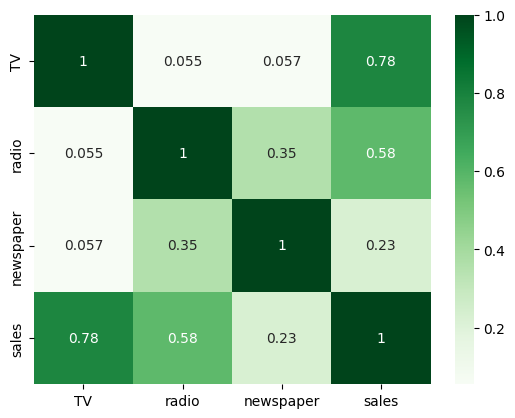

In [17]:
sns.heatmap(df.corr(),annot=True,cmap='Greens')

In [19]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [20]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [30]:
lr = LinearRegression()

In [31]:
lr.fit(x_train,y_train)

LinearRegression()

In [32]:
y_pred = lr.predict(x_test)

In [42]:
mse =  mean_squared_error(y_test,y_pred)

In [44]:
mae =  mean_absolute_error(y_test,y_pred) 

In [46]:
r2 =  r2_score(y_test,y_pred) 

In [47]:
mse

4.40211829144968

In [48]:
mae

1.3617813502090272

In [49]:
r2

0.8601145185017869

In [50]:
f"The model is performing mse: {mse},mae: {mae}, and R2: {r2}"

'The model is performing mse: 4.40211829144968,mae: 1.3617813502090272, and R2: 0.8601145185017869'

In [57]:
if r2 > 0.85:
    print("Model Performance is Good")
elif r2 > 0.75:
    print("The model Performance is Average")
else:
    print("The model is good")
    

Model Performance is Good


In [66]:
def model_acc(y_test, y_pred):
    mse = mean_squared_error(y_test, y_Pred)
    mae = mean_absolute_error(y_tesr, y_pred)
    r2 = r2_score(y_test,y_pred)
    prit(f"The model isperforming mse:{mse},mae:{mae} and r2:{r2}")

In [63]:
models = [LinearRegression(), Lasso(), Ridge()]

In [64]:
for model in models:
    model.fit(x_train, y_train)
    y_Pred = model.predict(x_test)

In [68]:
import pickle
with open("Lasso_model.pkl","wb") as f:
    pickle.dump(lr,f)